# DAI-101 Assignment

## Mrinal Subudhi
## 23117083
## ME-4 Batch-1

# Explorative Data Analysis on Car Sales Dataset

## Introduction

Here I am going to perform an exploratory data analysis (EDA) on a car sales dataset from Kaggle. The dataset contains various features such as customer demographics, car details, and sale information, which will be analyzed using univariate and multivariate techniques. The analysis includes handling missing values, checking for duplicates, encoding categorical variables, binning continuous variables, scaling, and applying transformations to normalize the data.


In [2]:
import sys
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
import sklearn
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv('./car_sales.csv')

In [4]:
df.sample(10).T

,17230,8068,599,5104,19438,3466,4317,21022,1615,12262
Car_id,C_CND_017231,C_CND_008069,C_CND_000600,C_CND_005105,C_CND_019439,C_CND_003467,C_CND_004318,C_CND_021023,C_CND_001616,C_CND_012263
Date,8/29/2023,11/13/2022,2/25/2022,9/1/2022,10/13/2023,6/25/2022,8/2/2022,11/13/2023,4/13/2022,3/26/2023
Customer Name,Lea,Luna,Jia,Lola,Gregoire,Krystal,Chiara,Ronan,Fradel,Camille
Gender,Female,Male,Male,Male,Female,Male,Male,Male,Female,Male
Annual Income,740000,13500,13500,550000,13500,1646000,666000,646500,765000,771000
Dealer_Name,Ryder Truck Rental and Leasing,Rabun Used Car Sales,Tri-State Mack Inc,Ryder Truck Rental and Leasing,Hatfield Volkswagen,Star Enterprises Inc,Progressive Shippers Cooperative Association No,Motor Vehicle Branch Office,Buddy Storbeck's Diesel Service Inc,Nebo Chevrolet
Company,Honda,Chevrolet,Chevrolet,BMW,Mercedes-B,Saab,Oldsmobile,Nissan,Chevrolet,Infiniti
Model,Civic,Impala,Cavalier,528i,CL500,3-Sep,Cutlass,Altima,Prizm,I30
Engine,DoubleÂ Overhead Camshaft,Overhead Camshaft,Overhead Camshaft,DoubleÂ Overhead Camshaft,Overhead Camshaft,DoubleÂ Overhead Camshaft,DoubleÂ Overhead Camshaft,DoubleÂ Overhead Camshaft,Overhead Camshaft,DoubleÂ Overhead Camshaft
Transmission,Auto,Manual,Manual,Auto,Manual,Auto,Auto,Auto,Manual,Auto


In [5]:
df.shape

(23906, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [7]:
df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


## Data Handling and Cleaning

Now we will clean and prepare this data to perform EDA on it.

### Checking and Handling of Missing Values

In [8]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

As only 1 missing value in customer name then we can easily drop the data from the dataset as it won't affect the mach.

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(23905, 16)

After Dropping the missing data from the dataframe the size decrease is visible

### Checking and handling for duplicate values

In [11]:
duplicate_rows = df.duplicated()
print(f"Duplicate rows:\n{duplicate_rows}")
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Duplicate rows:
0        False
1        False
2        False
3        False
4        False
         ...  
23901    False
23902    False
23903    False
23904    False
23905    False
Length: 23905, dtype: bool
Number of duplicate rows: 0


As no duplicate values therefore no need of handling

### Data Reduction

Removing some Columns that are unnecessary or irrelevant for analysis

In [12]:
df = df.drop(['Car_id', 'Customer Name','Phone','Dealer_No','Dealer_Region','Model'], axis=1,errors='ignore')

In [13]:
df.shape

(23905, 11)

## Encoding Categorical varibles

In [14]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [15]:
df.sample(10).T

,535,10841,17639,14777,740,4506,22872,8798,11796,17095
Date,2/16/2022,1/15/2023,9/4/2023,6/12/2023,3/5/2022,8/9/2022,12/11/2023,11/27/2022,3/10/2023,8/26/2023
Gender,1,1,0,1,1,1,0,1,1,1
Annual Income,580000,1031000,788000,13500,546000,1301000,650000,1680000,1245000,13500
Dealer_Name,Nebo Chevrolet,Progressive Shippers Cooperative Association No,Ryder Truck Rental and Leasing,Ryder Truck Rental and Leasing,Nebo Chevrolet,Ryder Truck Rental and Leasing,Race Car Help,C & M Motors Inc,Hatfield Volkswagen,Pars Auto Sales
Company,Volvo,Volkswagen,Chevrolet,Ford,Hyundai,Dodge,Mitsubishi,Chrysler,Mitsubishi,Lexus
Engine,Overhead Camshaft,DoubleÂ Overhead Camshaft,DoubleÂ Overhead Camshaft,DoubleÂ Overhead Camshaft,Overhead Camshaft,DoubleÂ Overhead Camshaft,Overhead Camshaft,Overhead Camshaft,Overhead Camshaft,DoubleÂ Overhead Camshaft
Transmission,Manual,Auto,Auto,Auto,Manual,Auto,Manual,Manual,Manual,Auto
Color,Black,Pale White,Black,Pale White,Pale White,Red,Red,Pale White,Pale White,Pale White
Price ($),17000,31100,21000,31000,21000,19100,19000,28000,21500,31000
Dealer_No,06457-3834,53546-9427,06457-3834,06457-3834,06457-3834,06457-3834,78758-7841,60504-7114,99301-3882,38701-8047


In [16]:
categorical_columns = ['Body Style', 'Transmission']

encoder = OneHotEncoder(drop='first', sparse_output=False) 
encoded_data = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
df_new = pd.concat([df, encoded_df], axis=1).drop(columns=categorical_columns)
df_new.sample(10).T

,14945,22266,23111,345,6081,3762,16195,17004,15616,20641
Date,6/17/2023,12/3/2023,12/17/2023,2/6/2022,9/21/2022,7/9/2022,7/23/2023,8/23/2023,7/8/2023,11/10/2023
Gender,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Annual Income,13500.0,696000.0,817000.0,13500.0,500000.0,636000.0,862000.0,962000.0,1500000.0,1395000.0
Dealer_Name,Chrysler of Tri-Cities,Progressive Shippers Cooperative Association No,Clay Johnson Auto Sales,Chrysler of Tri-Cities,Classic Chevy,Chrysler of Tri-Cities,Pars Auto Sales,C & M Motors Inc,Capitol KIA,Capitol KIA
Company,Mercedes-B,Saturn,Oldsmobile,Toyota,Mitsubishi,Hyundai,BMW,Buick,Lexus,Pontiac
Engine,Overhead Camshaft,DoubleÂ Overhead Camshaft,DoubleÂ Overhead Camshaft,Overhead Camshaft,DoubleÂ Overhead Camshaft,Overhead Camshaft,DoubleÂ Overhead Camshaft,DoubleÂ Overhead Camshaft,Overhead Camshaft,DoubleÂ Overhead Camshaft
Color,Pale White,Red,Black,Black,Black,Red,Black,Pale White,Pale White,Pale White
Price ($),14000.0,12001.0,60000.0,36000.0,17000.0,22000.0,31001.0,62000.0,54000.0,19501.0
Dealer_No,99301-3882,53546-9427,78758-7841,99301-3882,85257-3102,99301-3882,38701-8047,60504-7114,38701-8047,38701-8047
Body Style_Hatchback,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Binning Numerical variables

In [17]:
df['Income_Bin'] = pd.cut(df['Annual Income'], bins=[0, 500000, 2000000, 1.120000e+07], labels=['Low', 'Medium', 'High'])

In [18]:
df['Price_Bin'] = pd.cut(df['Price ($)'], bins=[0, 20000, 50000, 100000], labels=['Budget', 'Midrange', 'Luxury'])

In [19]:
df.sample(10).T

,15824,8981,22160,18891,11869,13708,5127,9275,5724,301
Date,7/16/2023,11/30/2022,12/2/2023,9/25/2023,3/12/2023,5/15/2023,9/3/2022,12/5/2022,9/15/2022,1/31/2022
Gender,1,1,1,1,1,1,1,1,1,1
Annual Income,603000,671000,861000,1679000,520000,13500,1825000,595000,750000,1012500
Dealer_Name,Chrysler of Tri-Cities,Tri-State Mack Inc,Iceberg Rentals,Gartner Buick Hyundai Saab,C & M Motors Inc,Rabun Used Car Sales,McKinney Dodge Chrysler Jeep,Race Car Help,Clay Johnson Auto Sales,Scrivener Performance Engineering
Company,Mercury,Chrysler,Lexus,Porsche,Ford,Chevrolet,Chevrolet,BMW,Chevrolet,Porsche
Engine,DoubleÂ Overhead Camshaft,DoubleÂ Overhead Camshaft,Overhead Camshaft,Overhead Camshaft,DoubleÂ Overhead Camshaft,DoubleÂ Overhead Camshaft,Overhead Camshaft,DoubleÂ Overhead Camshaft,DoubleÂ Overhead Camshaft,Overhead Camshaft
Transmission,Auto,Auto,Manual,Manual,Auto,Auto,Manual,Auto,Auto,Manual
Color,Pale White,Pale White,Black,Pale White,Red,Pale White,Red,Red,Black,Pale White
Price ($),29000,42001,69000,14901,29000,19000,82500,22001,31000,24250
Dealer_No,99301-3882,85257-3102,53546-9427,38701-8047,60504-7114,85257-3102,85257-3102,78758-7841,78758-7841,38701-8047


## Converting the 'Date' column to datetime format

In [20]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print(df['Date'].head())

0   2022-01-02
1   2022-01-02
2   2022-01-02
3   2022-01-02
4   2022-01-02
Name: Date, dtype: datetime64[ns]


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           23905 non-null  datetime64[ns]
 1   Gender         23905 non-null  int64         
 2   Annual Income  23905 non-null  int64         
 3   Dealer_Name    23905 non-null  object        
 4   Company        23905 non-null  object        
 5   Engine         23905 non-null  object        
 6   Transmission   23905 non-null  object        
 7   Color          23905 non-null  object        
 8   Price ($)      23905 non-null  int64         
 9   Dealer_No      23905 non-null  object        
 10  Body Style     23905 non-null  object        
 11  Income_Bin     23905 non-null  category      
 12  Price_Bin      23905 non-null  category      
dtypes: category(2), datetime64[ns](1), int64(3), object(7)
memory usage: 2.7+ MB


## Univariate Analysis

In [22]:
print(df.describe())

print(df['Gender'].value_counts())
print(df['Income_Bin'].value_counts())
print(df['Price_Bin'].value_counts())

                                Date        Gender  Annual Income  \
count                          23905  23905.000000   2.390500e+04   
mean   2023-03-01 14:35:12.261033216      0.786321   8.308466e+05   
min              2022-01-02 00:00:00      0.000000   1.008000e+04   
25%              2022-09-20 00:00:00      1.000000   3.860000e+05   
50%              2023-03-13 00:00:00      1.000000   7.350000e+05   
75%              2023-09-08 00:00:00      1.000000   1.176000e+06   
max              2023-12-31 00:00:00      1.000000   1.120000e+07   
std                              NaN      0.409911   7.200208e+05   

          Price ($)  
count  23905.000000  
mean   28089.540473  
min     1200.000000  
25%    18001.000000  
50%    23000.000000  
75%    34000.000000  
max    85800.000000  
std    14788.592495  
Gender
1    18797
0     5108
Name: count, dtype: int64
Income_Bin
Medium    15081
Low        7483
High       1341
Name: count, dtype: int64
Price_Bin
Midrange    13511
Budget      

### Count Plots for Analysis

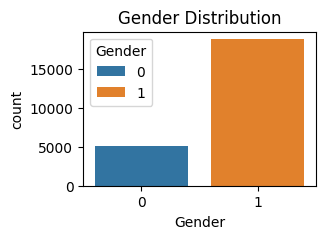

In [23]:
plt.figure(figsize=(3,2))
sns.countplot(x='Gender', data=df, hue='Gender')
plt.title('Gender Distribution')
plt.show()

From here we can see that male(1) customers are more than female(0)

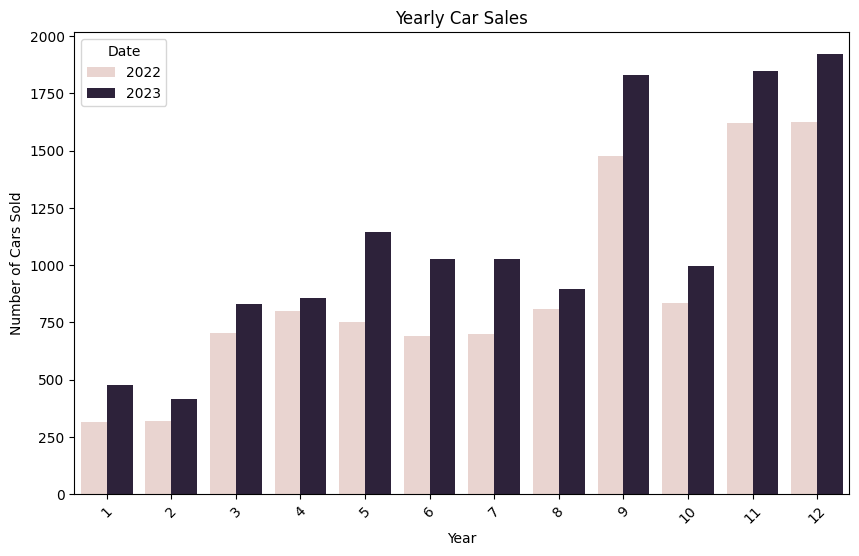

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Date'].dt.month,hue=df['Date'].dt.year, data=df)
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.title('Yearly Car Sales')
plt.xticks(rotation=45)
plt.show()

From here we can see that car sales keeps on increasing till the year end for both the years similarly with a dip in October

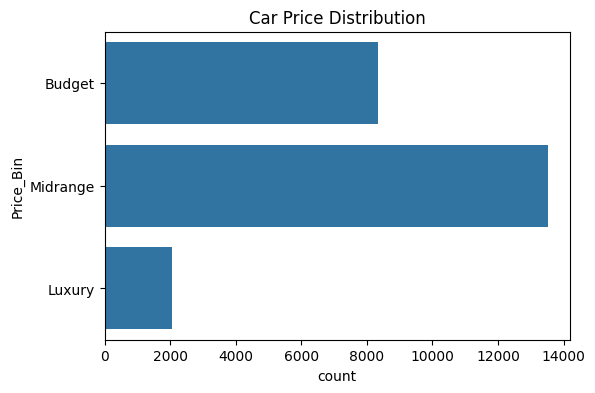

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(df['Price_Bin'])
plt.title('Car Price Distribution')
plt.show()

From here we can see that customers tend to buy Midrange cars more that is between 20K to 50K ($) 

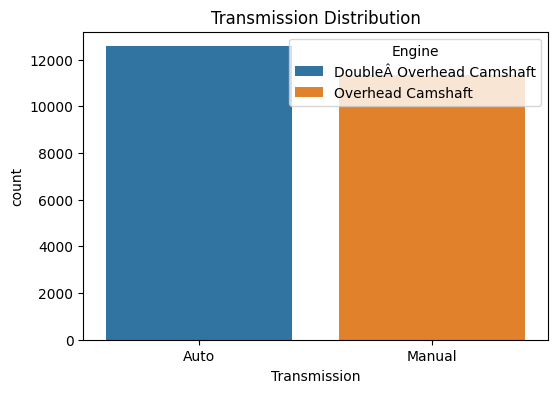

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Transmission'], hue=df['Engine'])
plt.title('Transmission Distribution')
plt.show()

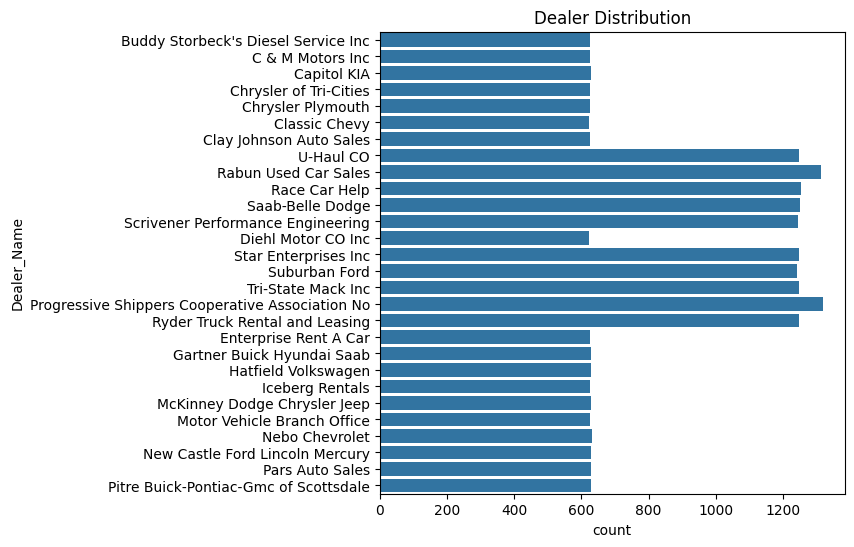

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(df['Dealer_Name'])
plt.title('Dealer Distribution')
plt.show()

### Pie Chart Analysis

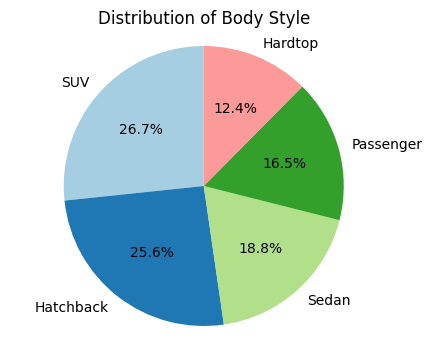

In [28]:
body_style_counts = df['Body Style'].value_counts()

plt.figure(figsize=(5,4))
plt.pie(body_style_counts, labels=body_style_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title('Distribution of Body Style')
plt.show()

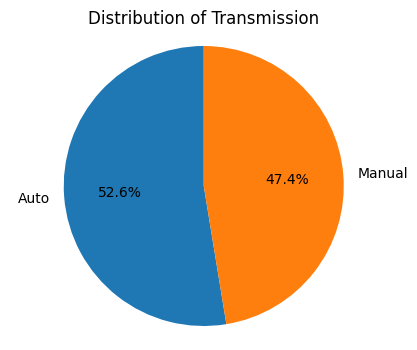

In [29]:
transmission_counts = df['Transmission'].value_counts()

plt.figure(figsize=(5,4))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Transmission')
plt.show()

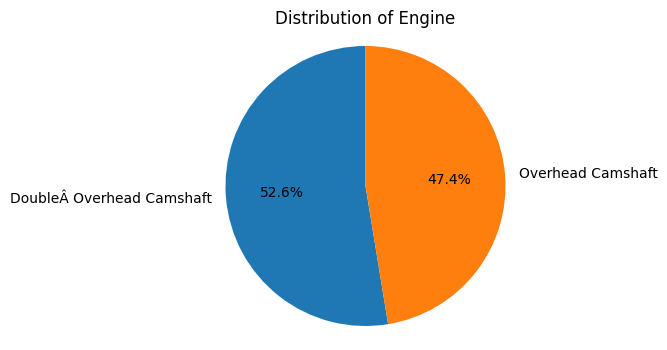

In [30]:
Engine_type_counts = df['Engine'].value_counts()

plt.figure(figsize=(5,4))
plt.pie(Engine_type_counts, labels=Engine_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Engine')
plt.show()

### Histogram Plot Analysis

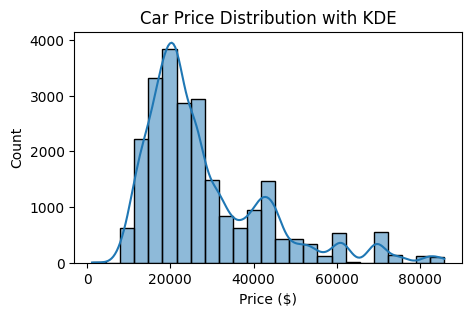

In [31]:
plt.figure(figsize=(5,3))
sns.histplot(df['Price ($)'], bins=25,kde=True)
plt.title('Car Price Distribution with KDE')
plt.show()

#### Box-Cox Transformation

In [32]:
df['BoxCox_Price'], _ = stats.boxcox(df['Price ($)'] + 1)
df.sample(10).T

,6755,21045,12283,13444,5215,15219,14614,7560,11366,4888
Date,2022-10-08 00:00:00,2023-11-14 00:00:00,2023-03-27 00:00:00,2023-05-06 00:00:00,2022-09-04 00:00:00,2023-06-25 00:00:00,2023-06-09 00:00:00,2022-11-05 00:00:00,2023-02-16 00:00:00,2022-08-24 00:00:00
Gender,1,1,1,1,1,1,1,1,1,0
Annual Income,1410000,3350000,800000,1070000,1250000,912000,916000,1750000,785000,13500
Dealer_Name,Ryder Truck Rental and Leasing,Tri-State Mack Inc,Buddy Storbeck's Diesel Service Inc,Rabun Used Car Sales,Hatfield Volkswagen,C & M Motors Inc,U-Haul CO,Race Car Help,Race Car Help,Hatfield Volkswagen
Company,Chrysler,Volkswagen,Infiniti,Nissan,Chrysler,Toyota,Volkswagen,Saab,Saturn,Mercedes-B
Engine,Overhead Camshaft,Overhead Camshaft,DoubleÂ Overhead Camshaft,DoubleÂ Overhead Camshaft,DoubleÂ Overhead Camshaft,Overhead Camshaft,Overhead Camshaft,DoubleÂ Overhead Camshaft,Overhead Camshaft,Overhead Camshaft
Transmission,Manual,Manual,Auto,Auto,Auto,Manual,Manual,Auto,Manual,Manual
Color,Black,Pale White,Pale White,Red,Pale White,Pale White,Pale White,Black,Pale White,Black
Price ($),51000,24001,51000,21001,20001,24000,12001,23001,13000,38001
Dealer_No,06457-3834,85257-3102,06457-3834,85257-3102,99301-3882,60504-7114,78758-7841,78758-7841,78758-7841,99301-3882


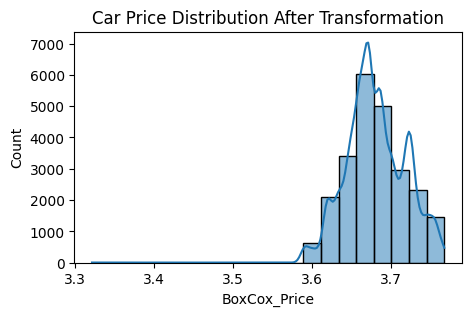

In [33]:
plt.figure(figsize=(5,3))
sns.histplot(df['BoxCox_Price'], bins=20, kde=True)
plt.title('Car Price Distribution After Transformation')
plt.show()

### Boxplot Analysis

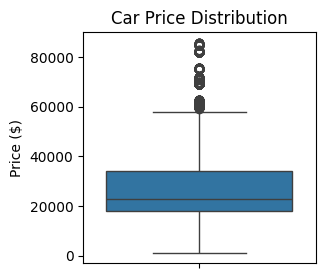

In [34]:
plt.figure(figsize=(3,3))
sns.boxplot(df['Price ($)'])
plt.title('Car Price Distribution')
plt.xticks(rotation=90)
plt.show()

## Multivariate Analysis

In [35]:
result=df.groupby('Company').agg(
    min_price=('Price ($)', 'min'),
    max_price=('Price ($)', 'max'),
    price_range=('Price ($)', lambda x: x.max() - x.min()),
    mean_price=('Price ($)', 'mean'),
    median_price=('Price ($)', 'median'),
    count_sales=('Price ($)', 'count'),
    std_price=('Price ($)', 'std')
).reset_index()

result

,Company,min_price,max_price,price_range,mean_price,median_price,count_sales,std_price
0,Acura,14000,45501,31501,24758.561684,24000.0,689,8183.046414
1,Audi,12000,85500,73500,22851.790598,24000.0,468,12904.243867
2,BMW,9000,69500,60500,25090.622785,21000.0,790,15065.578723
3,Buick,12000,62801,50801,33634.362187,29000.0,439,17142.232626
4,Cadillac,13000,85800,72800,40972.093558,34000.0,652,19517.120220
5,Chevrolet,10000,82800,72800,26198.606377,22000.0,1819,13311.063223
6,Chrysler,12000,51800,39800,26019.529464,22000.0,1120,11583.286811
7,Dodge,10000,60851,50851,26395.207186,23000.0,1670,11181.678786
8,Ford,1200,69600,68400,29263.682156,22225.5,1614,15849.090227
9,Honda,12000,54501,42501,28082.959040,26000.0,708,11148.629062


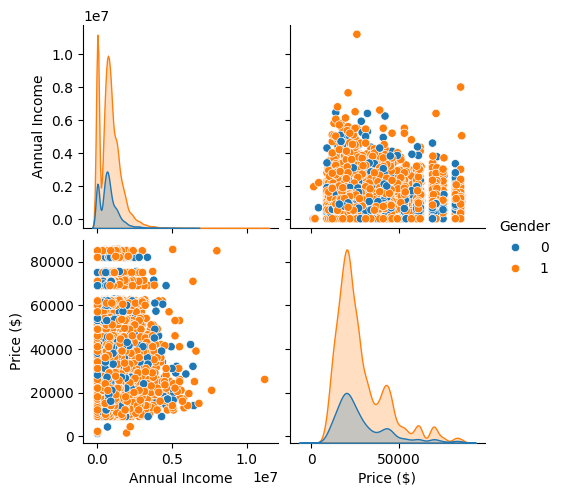

In [36]:
sns.pairplot(df[['Annual Income', 'Price ($)','Gender']], hue='Gender')
plt.show()

### Box Plots For Analysis

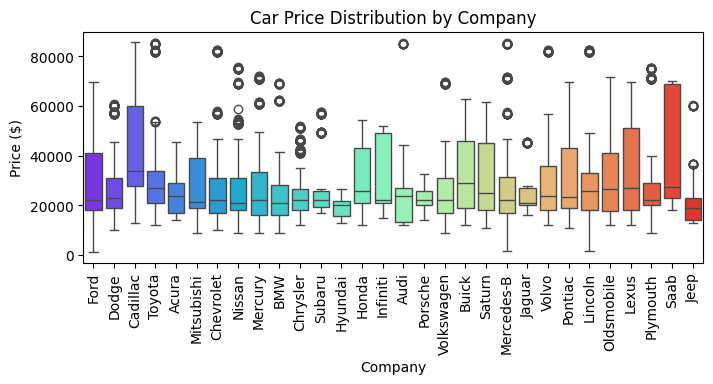

In [37]:
plt.figure(figsize=(8,3))
sns.boxplot(x='Company', y='Price ($)', hue='Company',data=df, palette='rainbow')
plt.title('Car Price Distribution by Company')
plt.xticks(rotation=90)
plt.show()

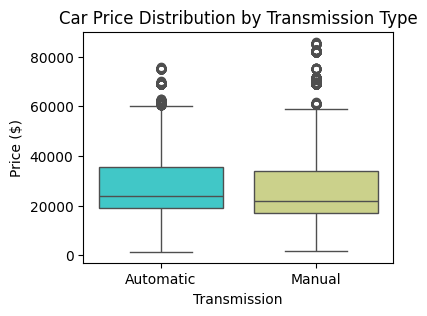

In [38]:
plt.figure(figsize=(4,3))
sns.boxplot(x='Transmission', y='Price ($)',hue='Transmission', data=df, palette='rainbow')
plt.title('Car Price Distribution by Transmission Type')
plt.xticks([0, 1], ['Automatic', 'Manual'])
plt.show()

### Scatter Plot for Analysis

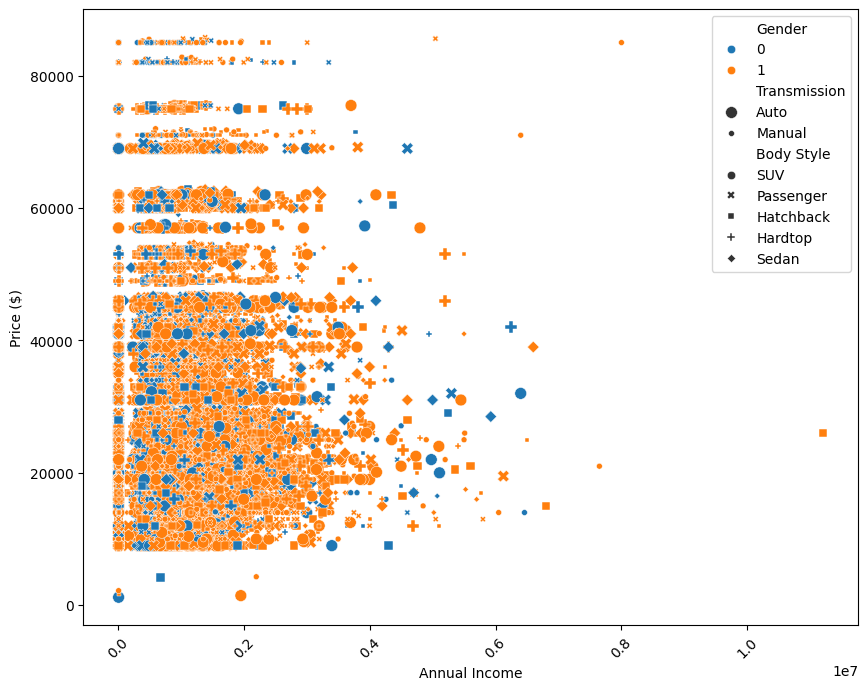

In [39]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='Annual Income' ,y='Price ($)' ,hue='Gender' ,style='Body Style' ,size='Transmission')
plt.xticks(rotation=45)
plt.show()

### Heatmaps for Analysis

<Axes: xlabel='Price_Bin', ylabel='Company'>

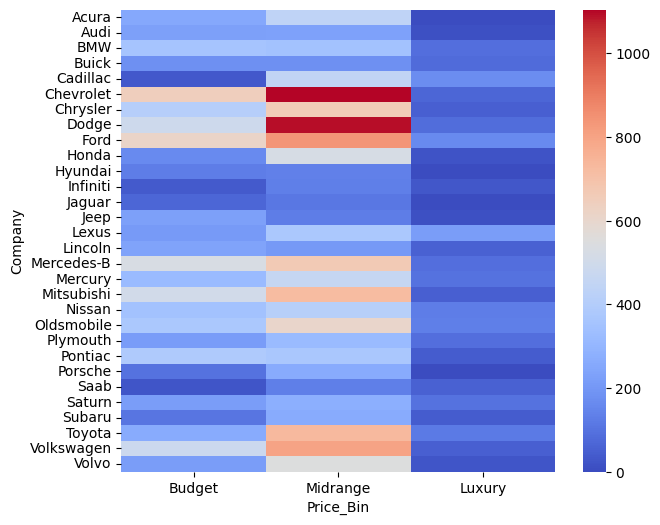

In [40]:
plt.figure(figsize=(7,6))
sns.heatmap(pd.crosstab(df['Company'],df['Price_Bin']),cmap='coolwarm')

<Axes: xlabel='Price_Bin', ylabel='Gender'>

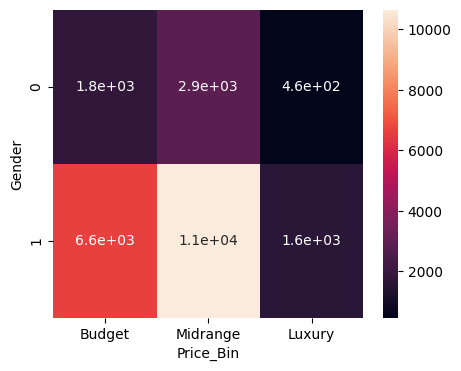

In [41]:
plt.figure(figsize=(5,4))
sns.heatmap(pd.crosstab(df['Gender'],df['Price_Bin']),annot=True)

Both Male and Female tend to buy Midrange cars more and Male own more care from female in all 3 categories

<Axes: xlabel='Color', ylabel='Gender'>

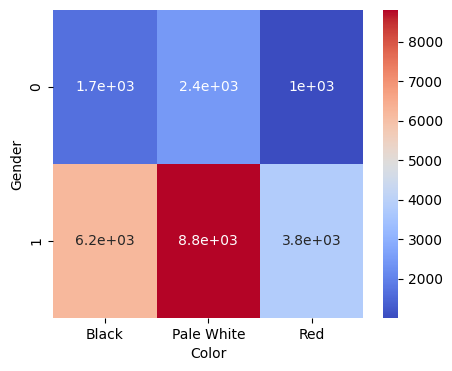

In [42]:
plt.figure(figsize=(5,4))
sns.heatmap(pd.crosstab(df['Gender'],df['Color']),annot=True,cmap='coolwarm')

From Here we can see that Male customers prefer Black more while Female customers prefer Pale White.

<Axes: xlabel='Body Style', ylabel='Company'>

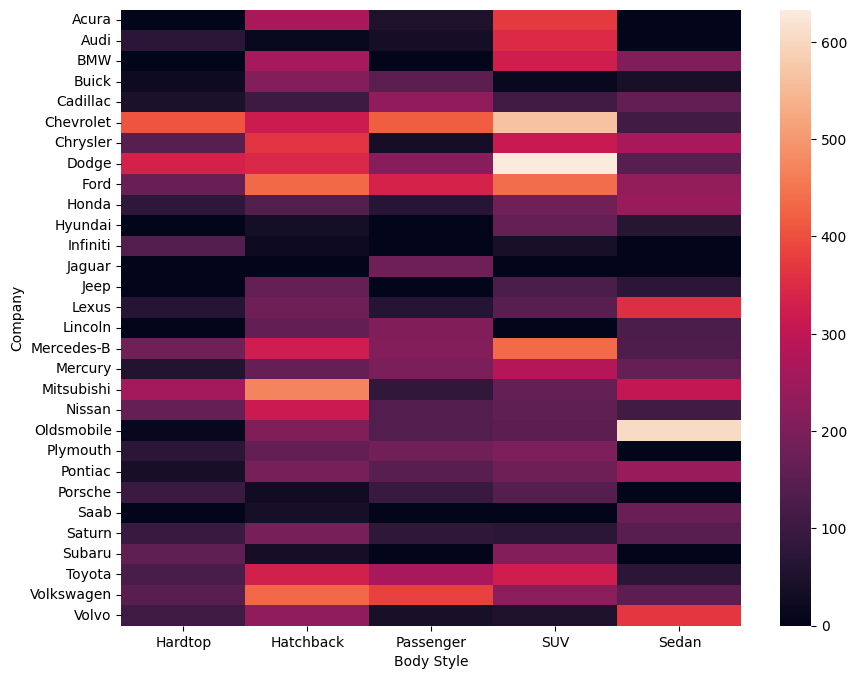

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(df['Company'],df['Body Style']))

From here we can say that Cheverolet for hardtop & passenger, Mitshubishi for Hatchback, Dodge for SUV and Oldsmobile for Sedan have more sales

### Barplots for Analysis

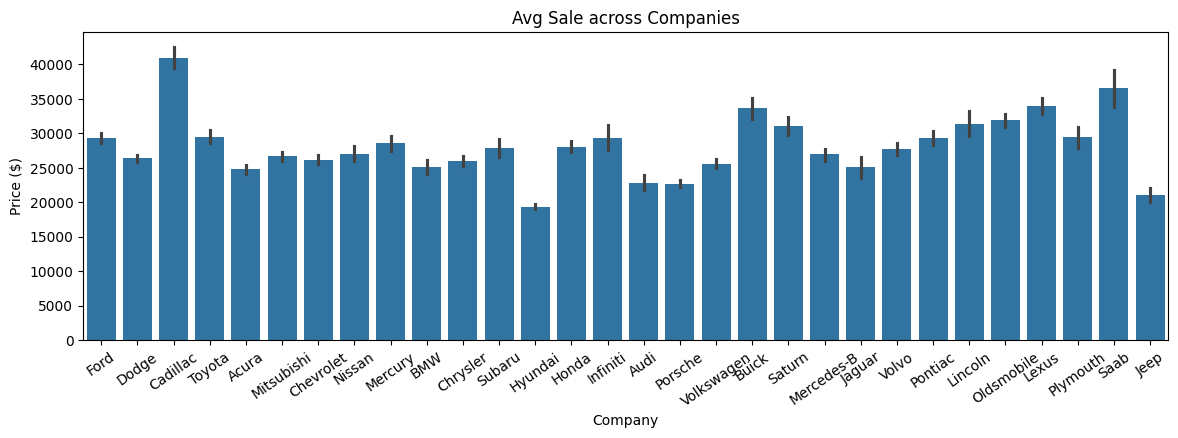

In [44]:
plt.figure(figsize=(14,4))
sns.barplot(x='Company',y='Price ($)', data=df)
plt.title('Avg Sale across Companies')
plt.xticks(rotation=35)
plt.show()

From here we can see that Cardillac and Saab have more average sales while Hyundai and Jeep have the least

### Violin Plots for Analysis

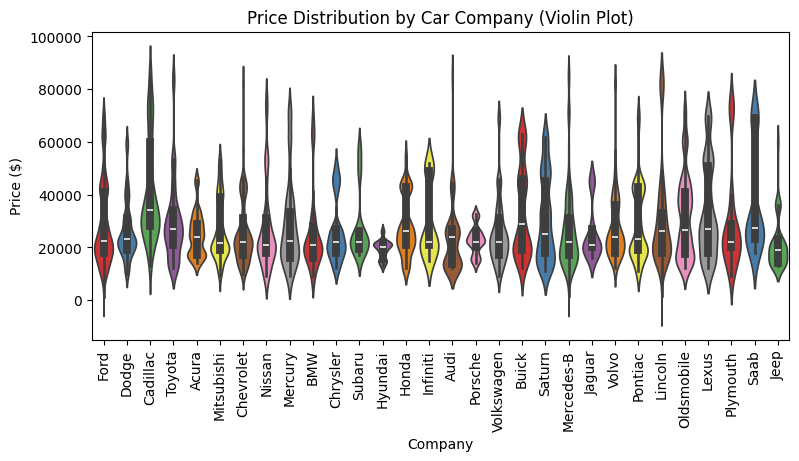

In [45]:
plt.figure(figsize=(9,4))
sns.violinplot(data=df, x='Company', y='Price ($)',hue='Company', palette='Set1')
plt.title('Price Distribution by Car Company (Violin Plot)')
plt.xticks(rotation=90)
plt.show()

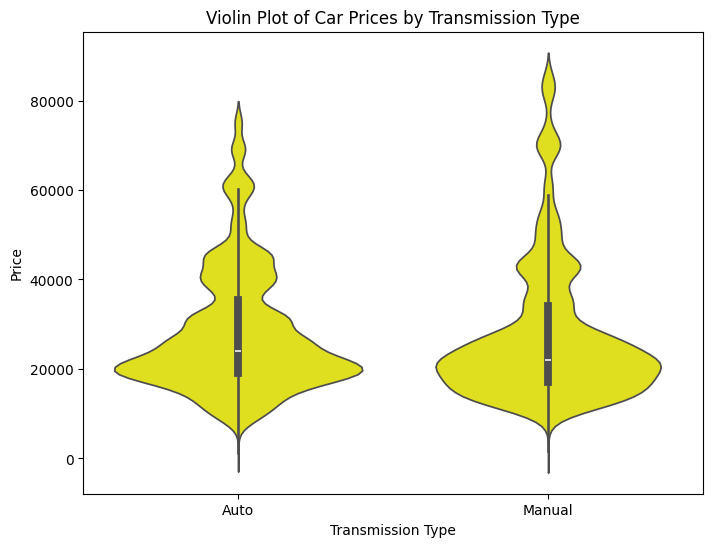

In [46]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Transmission', y='Price ($)', data=df,color='yellow')
plt.title('Violin Plot of Car Prices by Transmission Type')
plt.ylabel('Price')
plt.xlabel('Transmission Type')
plt.show()

The violin plot helped us to visualize the distribution of car prices for Automatic and Manual transmission types. It gave a more detailed view than a simple box plot, showing not just summary statistics but also the density of prices within each transmission type.
Based on the plot, we could conclude that automatic transmission cars have a higher average price with more variability, whereas manual transmission cars are generally more affordable with a smaller range of price

### Correlation Analysis

In [47]:
corr_matrix = df[['Annual Income', 'Price ($)']].corr()
print(corr_matrix)

               Annual Income  Price ($)
Annual Income       1.000000   0.012075
Price ($)           0.012075   1.000000


This shows that there is no significant relation between the customers income and the price of the car he or she owns.

In [48]:
x = df['Annual Income'].to_numpy()
y = df['Price ($)'].to_numpy()
np.corrcoef(x, y)

array([[1.        , 0.01207532],
       [0.01207532, 1.        ]])

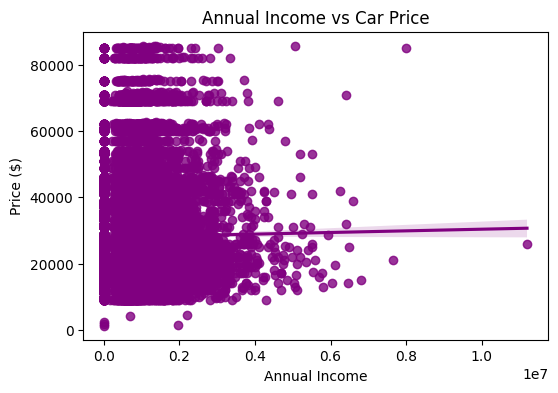

In [49]:
plt.figure(figsize=(6,4))
sns.regplot(x='Annual Income', y='Price ($)', data=df,color='purple')
plt.title('Annual Income vs Car Price')
plt.show()

Here we have the scatterplot between price and anual income with line of best fit or trend line

### Statical Parameters for Analysis

#### ANOVA Test

In [50]:
anova_result = stats.f_oneway(*[df[df['Company'] == company]['Price ($)'].values for company in df['Company'].unique()])
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

ANOVA result: F-statistic = 51.2703867182539, p-value = 7.02346588875977e-286


Here ANOVA is used to compare car prices across different companies. Since the p-value is far below a typical significance threshold (e.g., 0.05), we can reject the null hypothesis. This means that the differences in mean prices between the companies are statistically significant.


#### Chi-2 Test

In [51]:
contingency_table = pd.crosstab(df['Transmission'], df['Company'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test: Chi2 = {chi2}, p-value = {p}, Degrees of Freedom = {dof}")


Chi-Square Test: Chi2 = 1521.32949448676, p-value = 1.5413668588966505e-302, Degrees of Freedom = 29


Since the p-value is extremely small, you can reject the null hypothesis. This means that there is a statistically significant association between the type of transmission and the company. In other words, the type of transmission a car has is likely influenced by or related to the car company.

#### Z-test

In [52]:
manual_prices = df[df['Transmission'] == 'Manual']['Price ($)']
auto_prices = df[df['Transmission'] == 'Auto']['Price ($)']

mean_manual = np.mean(manual_prices)
mean_auto = np.mean(auto_prices)
std_manual = np.std(manual_prices, ddof=1)  
std_auto = np.std(auto_prices, ddof=1)  

n_manual = len(manual_prices)
n_auto = len(auto_prices)

z_stat = (mean_manual - mean_auto) / np.sqrt((std_manual**2 / n_manual) + (std_auto**2 / n_auto))

p_value = 2 * (1 - stats.norm.cdf(np.abs(z_stat)))  # Two-tailed test

print(f"Comparison: Manual vs Automatic Transmission Prices")
print(f"Z-Statistic: {z_stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between manual and automatic transmission prices.")
else:
    print("There is no significant difference between manual and automatic transmission prices.")

Comparison: Manual vs Automatic Transmission Prices
Z-Statistic: -1.72307304482167
p-value: 0.08487531661751535
There is no significant difference between manual and automatic transmission prices.


## Conclusion

#### Male Customers are more than female. Both male and female have a same trend of car like Midrange>Budget>Luxury. Female prefer pale-white where as Male prefer black color. No significant difference in transmission based sales its approximately 50-50. And from the analysis we can see that Auto transmission comes with double overhead camshaft engine where as manual comes with Overhead camshaft engine.
#### Companies like Licoln have a wide range of car price from budget to luxury. Companies like Cheverolet for hardtop & passenger, Mitshubishi for Hatchback, Dodge for SUV and Oldsmobile for Sedan have more sales. Companies like Chevrolet and Doge have high sales in Midrange category and Lexus in Luxury category. And Cardillac has the highest average sales of all.
#### Dealers like Rabun Used Car Sales and Progressive Reports Cooperative Association have more sales than others.